#A/B testing 
* A/B Testing method cover the statistical hypothesis tests are used to reveal significance of the difference in a metric variable values between two groups such a Group A and Group B. 
* It common use to campare or measure the result of approach in any area of work such as compare the effect of promotion and normal price as in this notebook examples case or to compare maketing campaing result of difference ads boost blach blach blah

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

%matplotlib inline
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
from termcolor import colored

#1. Data
* I demonstrates simple data of promotion effect test with normal price(RSP)  
* data values is the offtake (sales in pcs per week per store)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AB_testing/AB_testing_data.csv')

In [ ]:
data.head()

,RSP,PRO
0,2.83,3.39
1,2.63,4.90
2,2.55,4.60
3,2.87,4.23
4,2.59,3.79


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RSP     24 non-null     float64
 1   PRO     24 non-null     float64
dtypes: float64(2)
memory usage: 512.0 bytes


In [ ]:
data.describe()

,RSP,PRO
count,24.000000,24.000000
mean,2.882083,4.069167
std,0.289422,0.639333
min,2.410000,2.950000
25%,2.682500,3.597500
50%,2.815000,4.220000
75%,3.007500,4.445000
max,3.650000,5.490000


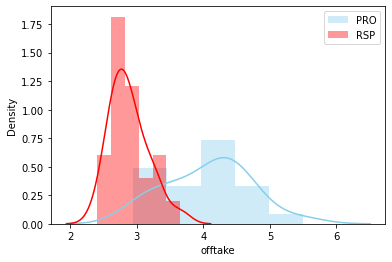

In [ ]:
sns.distplot(data['PRO'] , color="skyblue", label="PRO")
sns.distplot(data['RSP'] , color="red", label="RSP")
plt.legend()
plt.xlabel('offtake')
plt.show()

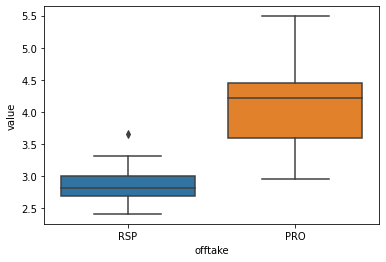

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(data))
plt.xlabel('offtake')
plt.show()

from visualize data show quite differ of RSP and PRO, lets use statistic to confirm our eye see

#2. Normality and Variance test

**Normality**:
* It is necesarry to decide which way of testing the significany of difference will be choosen. Shaphiro Wilks test is a way to test if the serie has normal distribution or not 
* The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [ ]:
#Normality test
RSP_shaphiro_w, RSP_shaphiro_p = shapiro(data['RSP'])
PRO_shaphiro_w, PRO_shaphiro_p = shapiro(data['PRO'])

In [ ]:
print("RSP_shaphiro_p = %.3f, PRO_shaphiro_p = %.3f" % (RSP_shaphiro_p, PRO_shaphiro_p),"\n")

RSP_shaphiro_p = 0.254, PRO_shaphiro_p = 0.644 



Shaphiro Wilk Test resulted as 0.644 , p > .05 for offtake of RSP and PRO which indicates that H0 can NOT be rejected. Accordingly distribution of Impression values in  offtake of RSP and PRO are likely to **normal distribution**.

**Variance**:
* If p value of the test is greater than .05 Independent Samples t Test will be done with "equal_var=True" extention.

* If p value of the test is less than .05 Independent Samples t Test will be done with "equal_var=False" extention.

In [ ]:
#Variance test
levene_stat, levene_p = stats.levene(data['RSP'], data['PRO'])

In [ ]:
print("levene_stat = %.3f, levene_p = %.3f" % (levene_stat, levene_p),"\n")

levene_stat = 8.870, levene_p = 0.005 



In [ ]:
[np.var(x, ddof=1) for x in [data['RSP'], data['PRO']]]

[0.08376503623188403, 0.4087471014492753]

* Levene's Test for Homogeneity resulted as 0.005 p < .05 which indicates that H0 can be rejected. Accordingly variances of offtake of RSP and PRO are not equal. 
* t Test will be done with "equal_var=False" extention.

#3. T-test

The null hypothesis (H0) and alternative hypothesis (H1) of the Independent Samples t Test can be expressed in two different but equivalent ways:

* H0: µ1 = µ2 (the two samples means are equal)
* H1: µ1 ≠ µ2 (the two samples means are not equal)

In [ ]:
t_value, t_test_p = stats.ttest_ind(data['RSP'], data['PRO'], equal_var=False)

In [ ]:
print("t_value = %.3f, t_test_p = %.10f" % (t_value, t_test_p),"\n")

t_value = -8.287, t_test_p = 0.0000000018 



Independent Samples t Test resulted as  0.0000000018, p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between RSP and PRO in offtake values. 

Mean of PRO in Impression is greater than RSP
that make sence in term of do promotion can drive customer easy to pick up and the result was confirm by statistic test this promotion WORK!!